In [1]:
import glob

import numpy             as np
import matplotlib.pyplot as plt

from CCfun  import filter_df

from CCplot import plot1d
from CCplot import plot2d
from CCplot import plot_line
from CCplot import auto_plot_style
from CCplot import figure_sizes
from CCplot import subplots

from CCdatabase import paper_signals
from CCdatabase import californication_irradiation_mapping

from CCio import load_and_process
from CCio import merge_measurements

In [2]:
%matplotlib inline

auto_plot_style()

In [3]:
%load_ext autoreload
%autoreload 2

# All data

In [4]:
filenames   = glob.glob("/Users/Gonzalo/github/CCdata/Californication/final/*pre.h5")
measurement = merge_measurements(map(load_and_process, filenames, range(len(filenames))))

In [5]:
measurement.crystals.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0       False        4        2          0        1000    516       0.1   
1       False        4        2          0        1000    516       0.1   
2       False        4        2          0        1000    516       0.1   
3       False        4        2          0        1000    516       0.1   
4       False        4        2          0        1000    516       0.1   

   ex_wl    power  em_wl  counts  crystal_id crystal_type  bkgsub    rate  \
0  625.0  0.00001  641.5    4002  CaF_B1_281          CaF   737.0  7370.0   
1  625.0  0.00001  642.0    3967  CaF_B1_281          CaF   702.0  7020.0   
2  625.0  0.00001  642.5    3873  CaF_B1_281          CaF   608.0  6080.0   
3  625.0  0.00001  643.0    3871  CaF_B1_281          CaF   606.0  6060.0   
4  625.0  0.00001  643.5    3824  CaF_B1_281          CaF   559.0  5590.0   

        quantar       dquanta  wheel_no  
0  3.093748e+15  2.382223e-12         0  
1  3.093748e+15  2.269092e-12         0  
2  3.093748e+15  1.965253e-12         0  
3  3.093748e+15  1.958789e-12         0  
4  3.093748e+15  1.806870e-12         0

In [6]:
def plot_pre(crystal_type, ex_wl, **overrides):
    grating = 1 + int(ex_wl >= 400)
    selections = dict(crystal_type = crystal_type,
                      ex_wl        =        ex_wl,
                      exposure     =           10,
                      exp_index    =            0,
                      grating      =      grating,
                      slit_width   =         1000,
                      looparound   =        False)
    selections.update(overrides)

    gb       = filter_df(measurement.crystals, selections).groupby("crystal_id")
    crystals = list(gb.groups.keys())
    n        = len(crystals)

    plt.figure(figsize=figure_sizes[n])
    for k, crystal_id in enumerate(crystals, start=1):
        pre  = gb.get_group(crystal_id)
        assert len(pre) == 1600, (len(pre), 1600)

        sg_pre  = pre[pre.em_wl.values > ex_wl + 30]

        plt.subplot(*subplots[n], k)
        plot1d(sg_pre .em_wl  .values,
               sg_pre .dquanta.values,
               ylabel = "ph/ph/s"    ,
               title  = crystal_id + " " + californication_irradiation_mapping[crystal_id])

        for signal in paper_signals[crystal_type]:
            plot_line(signal, color="b", linestyle=":", label=f"{signal} nm CC")

        ex = ex_wl
        while ex < plt.xlim()[1]:
            plot_line(ex, color="g", linestyle=":")
            ex += ex_wl

        plt.legend()
    plt.tight_layout()

# Sp

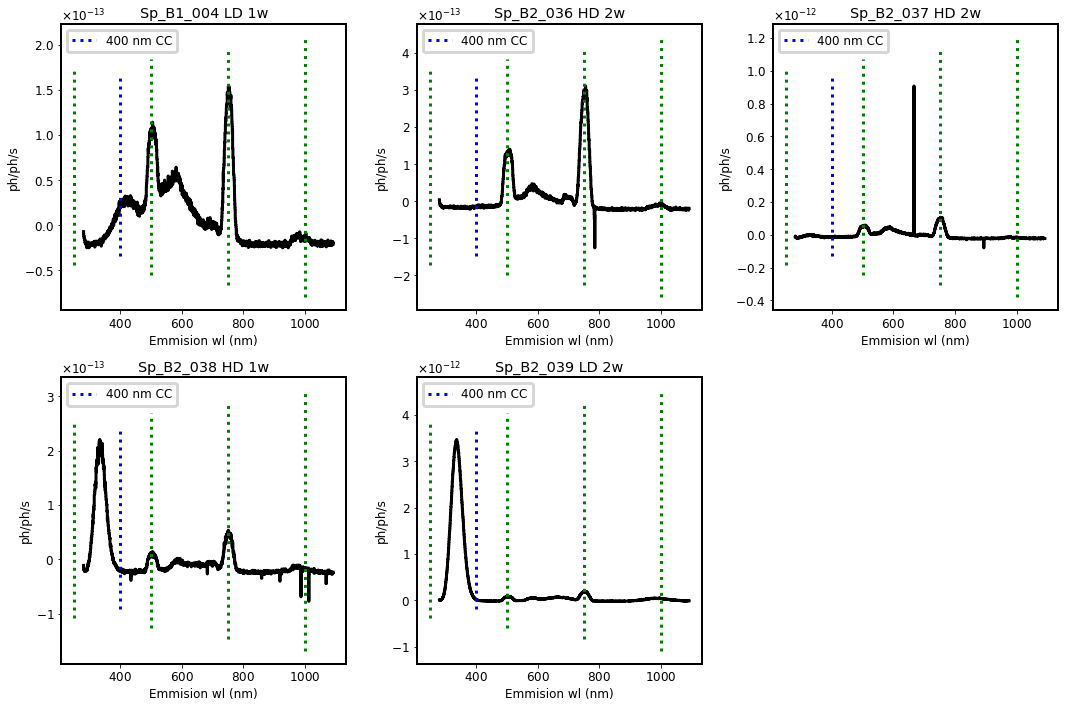

In [7]:
plot_pre("Sp", 250)

# Qz

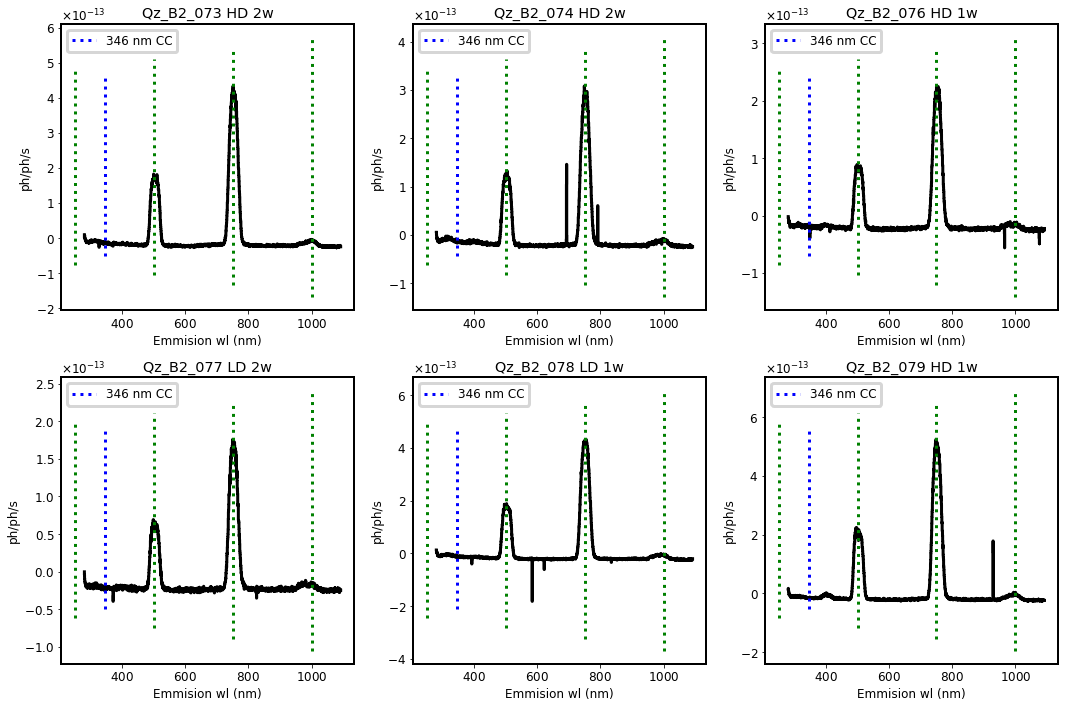

In [8]:
plot_pre("Qz", 250)

# CaF

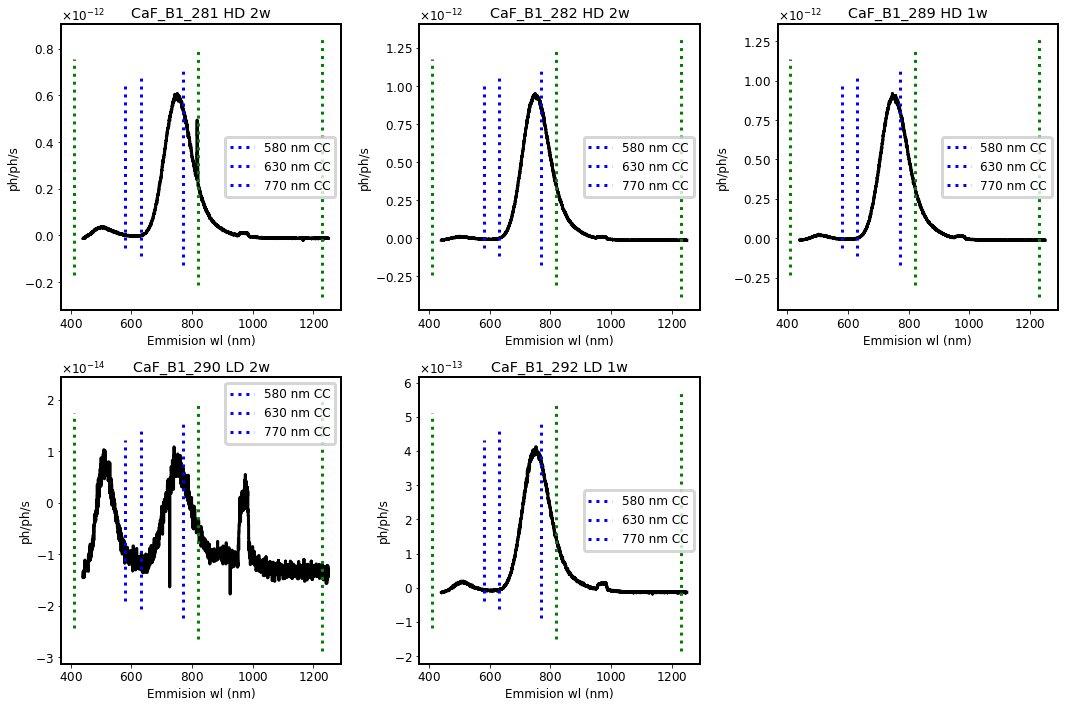

In [9]:
plot_pre("CaF", 410)

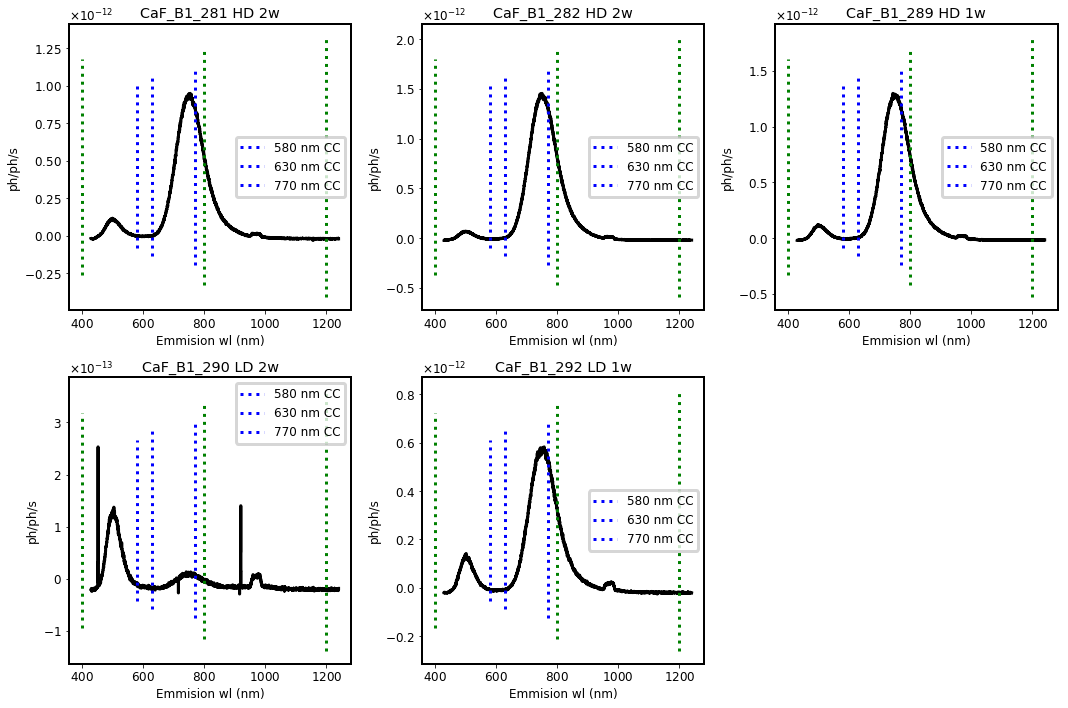

In [10]:
plot_pre("CaF", 400)

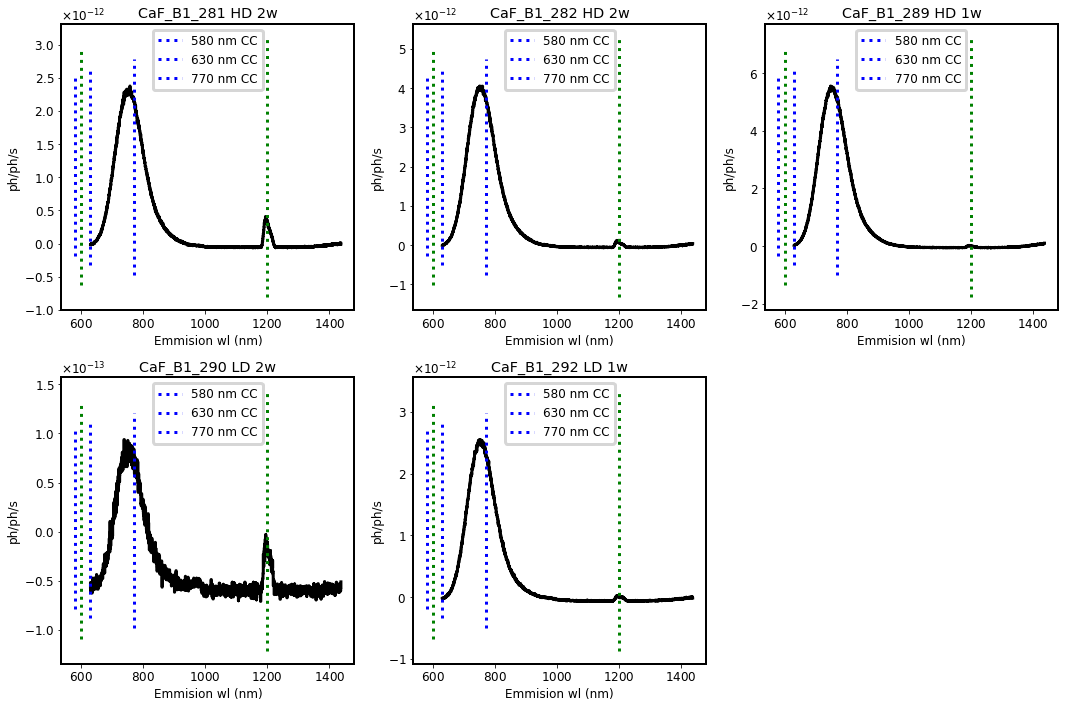

In [11]:
plot_pre("CaF", 600, exposure=1)

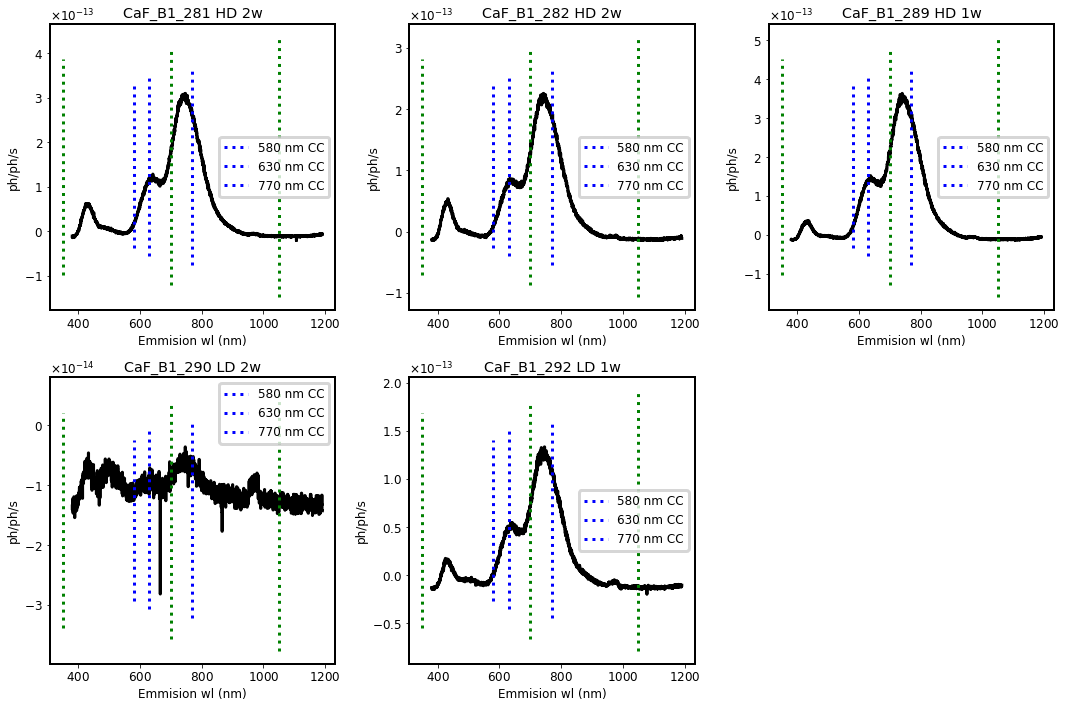

In [12]:
plot_pre("CaF", 350)

# BaF

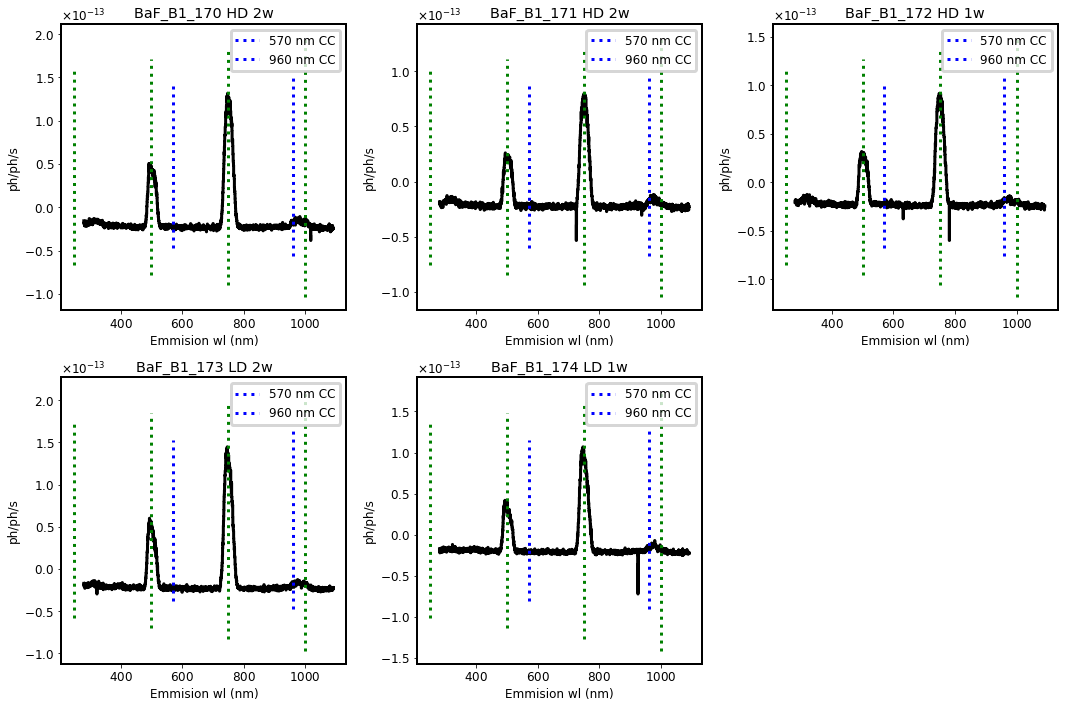

In [13]:
plot_pre("BaF", 250)

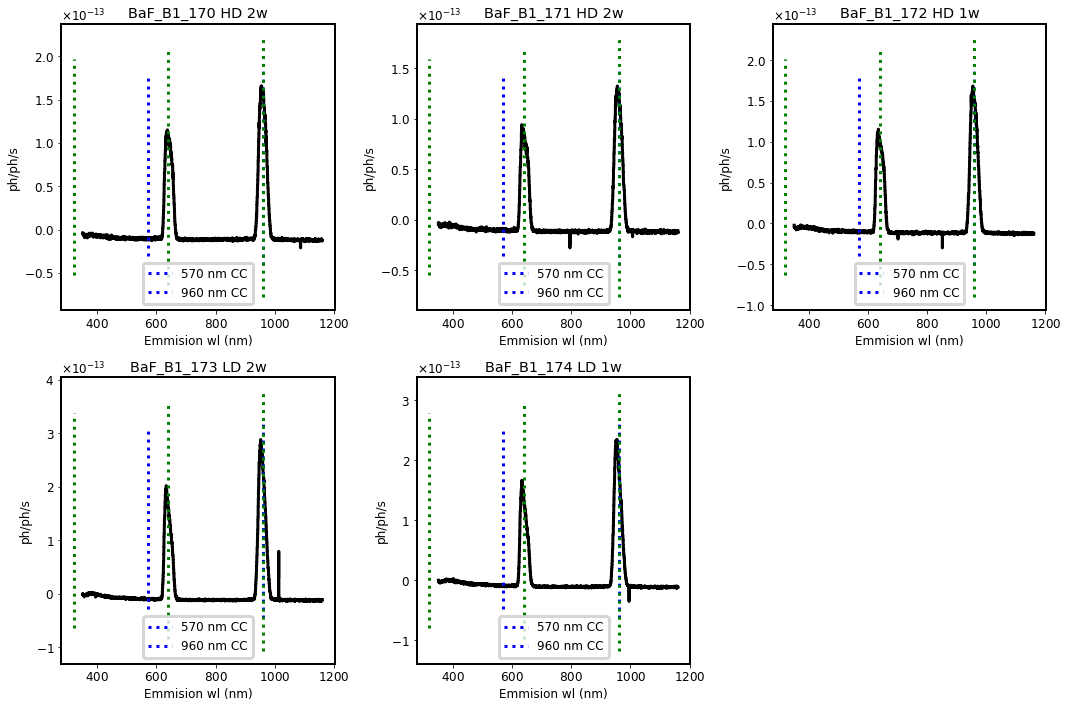

In [14]:
plot_pre("BaF", 320)